In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson

anscombe_df = pd.DataFrame({
    'x1': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
    'x2': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
    'x3': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
    'x4': [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8],
    'y1': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    'y2': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
    'y3': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    'y4': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 5.56, 5.91, 6.89, 6.89]
})
#  DataFrame Anscombe
anscombe_df

  

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,5.56
8,12,12,12,8,10.84,9.13,8.15,5.91
9,7,7,7,8,4.82,7.26,6.42,6.89


TODO:
- X Stats analysis
- Auto Correlation 
- Leverage for third dataset 
- residuals vs x 4th dataset

In [2]:
anscombe_df.describe()

,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,6.809091
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,1.171055
min,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,5.835000
50%,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,6.890000
75%,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,7.375000
max,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,8.840000


We calculated all basic statical descriptions for the dataset values of x and y and it seems they are very similar in terms of: 
- mean 
- standard deviation
- minimum value (for the first 3 datasets)
- max value (for the first 3 datasets)
- quantiles (for the first 3 datasets)

However, when we ran the scatterplots for each dataset, visualization helped us to understand these datasets are not similar and have very distinctive characteristics. As DataScientists, it is important to consider visualization tools during the Exploratory Data Analysis, not only numeric statistics.   

 All of the regression model fits are the same, but the residuals are quite different. The thesis
 of your report will be that for these data sets, the most meaningful analysis is not what the
 model explains but analyzing what the model doesn’t explain (residuals).
 At this stage We are running regression model and summare information for each datasets and also show residual plot for each datasets. 
 

In [3]:
# Add a constant for the intercept in regression
X = sm.add_constant(anscombe_df.x1)  
y = anscombe_df.y1

# Fit OLS Regression Model
model_1 = sm.OLS(y, X).fit()

# Print summary of the model
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Thu, 06 Mar 2025   Prob (F-statistic):            0.00217
Time:                        13:18:12   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

c:\Users\AsusTUF\anaconda3\envs\mllabs_python\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [4]:
def plot_scatter(x, y, group_name:str):
    #EDA #Exploratory Data Analysis (EDA)
    plt.scatter(x, y, color='blue', marker='o', label="Data Points")

    plt.xlabel(f"X-axis Label For {group_name}")
    plt.ylabel(f"Y-axis Label For {group_name}")
    plt.title("Scatter Plot for EDA")

    plt.show()

In [5]:
def evaluate_model(model, group_name:str="group_name")->dict: 
    """
    Creates plots and statistics from fitted model
    """
    #Residual Analysis for group_name
    residuals= model.resid
    fitted_values = model.fittedvalues

    # Calculate mean, variance of the residuals
    mean_residual = np.mean(residuals)
    variance_residual = np.var(residuals)

    # Estimate of sigma squared (variance of residuals)
    n = len(residuals)
    RSS_1 = np.sum(residuals ** 2)
    sigma_squared = RSS_1 / (n - 2)

    # Print the values
    print(f"Mean of residuals ({group_name}): {mean_residual:.2f}")
    print(f"Variance of residuals ({group_name}): {variance_residual:.2f}")
    print(f"Estimated sigma^2 ({group_name}): {sigma_squared:.4f}")
    print(f"Durbin-Watson statistic (autocorrelation):", durbin_watson(residuals))

    # Plot histogram of residuals 
    plt.hist(residuals, bins=10, edgecolor="black", alpha=0.7)
    plt.xlabel("Residual Value")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of Residuals for {group_name}")
    plt.show()

    # Box plot for the residuals
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=residuals, color='blue')
    plt.title(f"Box Plot of Residuals for {group_name}")
    plt.xlabel("Residuals")
    plt.show()

    # Q-Q plot for residuals
    sm.qqplot(residuals, line="45", fit=True)
    plt.title(f"Q-Q Plot of Residuals for {group_name}")
    plt.show()

    #residual and fitted_value for model
    sns.scatterplot(x=fitted_values, y=residuals)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)  
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs. Fitted Values for {group_name}")
    plt.show()
    
    evaluation = {
        "sigma_squared": sigma_squared,
        "RSS": RSS_1,
    }
    return evaluation 

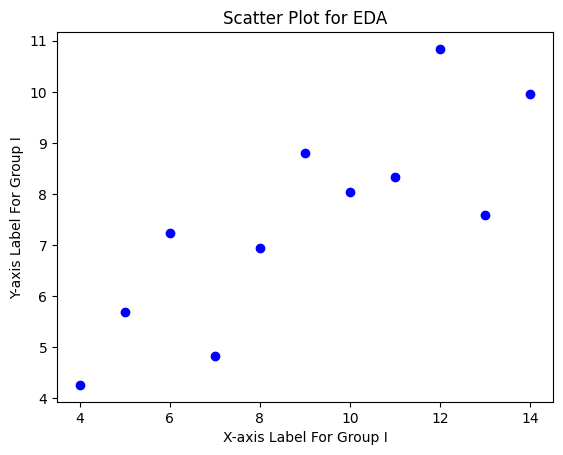

In [6]:
plot_scatter(anscombe_df.x1, anscombe_df.y1, "Group I")

Mean of residuals (Group I): 0.00
Variance of residuals (Group I): 1.25
Estimated sigma^2 (Group I): 1.5292
Durbin-Watson statistic (autocorrelation): 3.2122899593630643


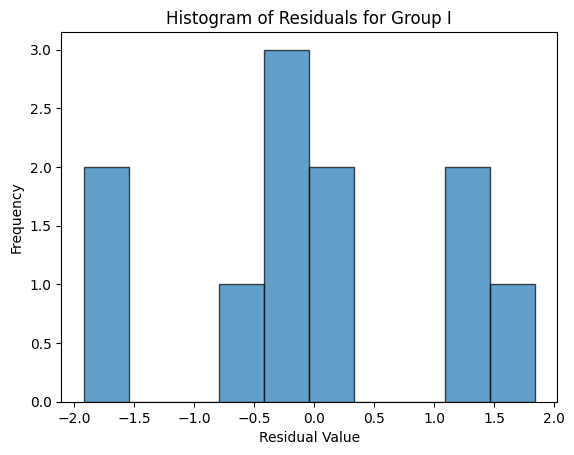

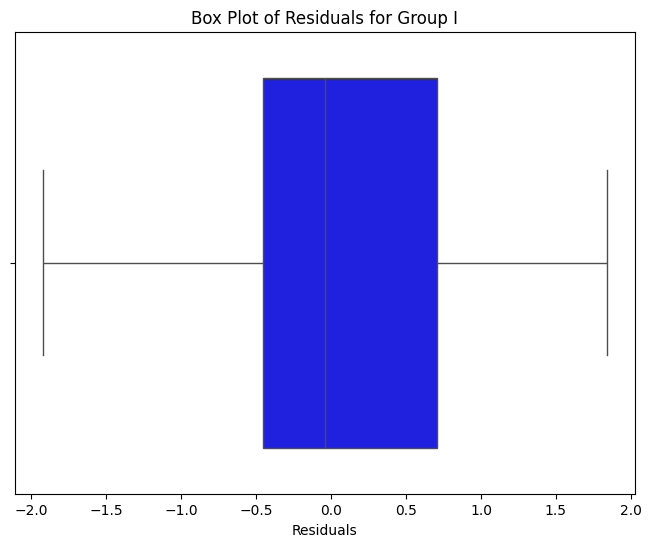

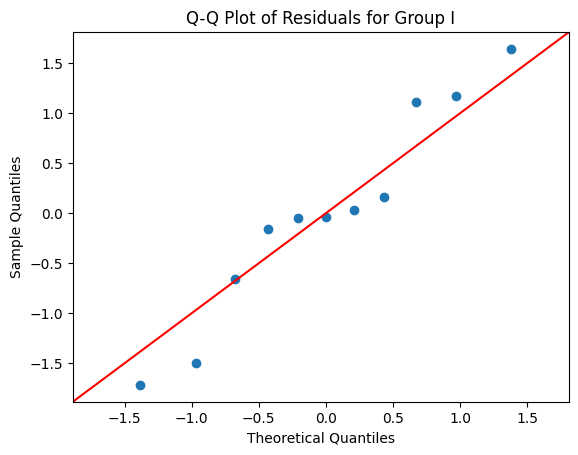

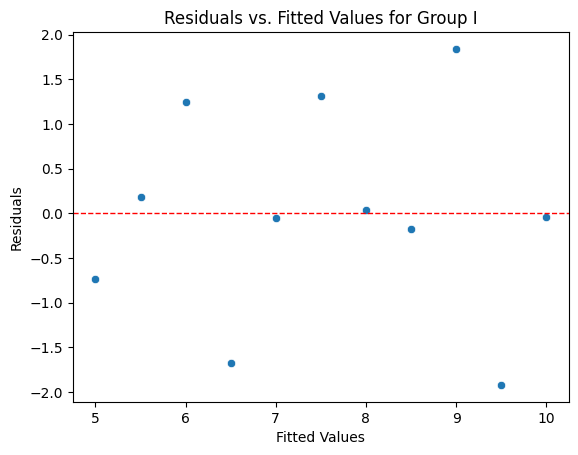

In [7]:
eval1 = evaluate_model(model_1, "Group I")

As the scatter plot is showing the relationship between X and Y is linear but it is not very strong relationship, the model coefficient  beta_0 is 3.0001 and beta_1 is 0.5001 and also R^2 is  0.667 which indicate only 66.7 of spread over Y is explained by X variable .  Using Maximum Likelihood Estimation (MLE), we have estimated three parameters for the linear regression model: the coefficients beta_0 and beta_1 as well as Sigma^2 which is estimated by Residual sum of squared (RSS).  In the Q-Q plot of the residuals, the data points do not lie on the Q-Q line, suggesting that the residuals do not follow a normal distribution. From the histogram of the residuals for Model I, it can be concluded that the mode and mean of the residuals is zero. However, the residuals are not perfectly scattered around the mean, indicating some deviation from the expected distribution.The mean of the residuals for Group I is 0.00, the variance of the residuals is 1.25, and the estimated sigma^2 for Group I is 1.5292. By analyzing the last plot of residuals versus fitted values, it is confirmed that this linear model is a good choice for this dataset, as the residuals are evenly scattered around zero.

In [8]:
# Add a constant for the intercept in regression
X = sm.add_constant(anscombe_df.x2)  
y = anscombe_df.y2

# Fit OLS Regression Model
model_2 = sm.OLS(y, X).fit()

# Print summary of the model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Thu, 06 Mar 2025   Prob (F-statistic):            0.00218
Time:                        13:18:13   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0009      1.125      2.667      0.0

c:\Users\AsusTUF\anaconda3\envs\mllabs_python\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


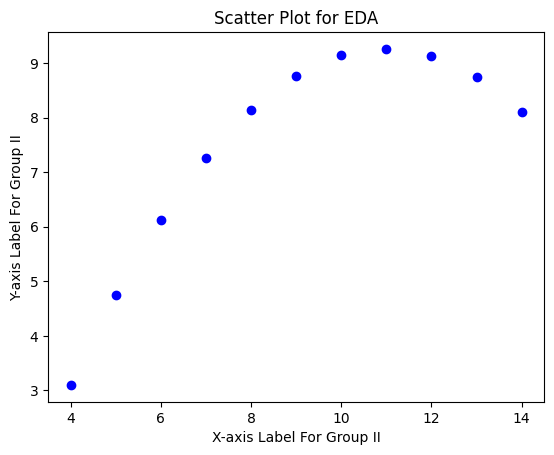

In [9]:
plot_scatter(anscombe_df.x2, anscombe_df.y2, "Group II")

Mean of residuals (Group II): -0.00
Variance of residuals (Group II): 1.25
Estimated sigma^2 (Group II): 1.5307
Durbin-Watson statistic (autocorrelation): 2.187569948897711


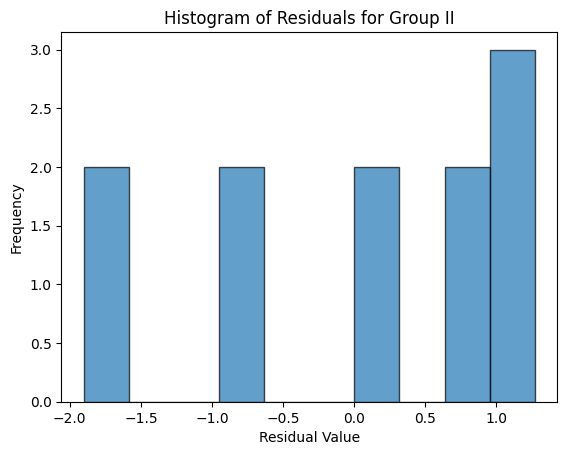

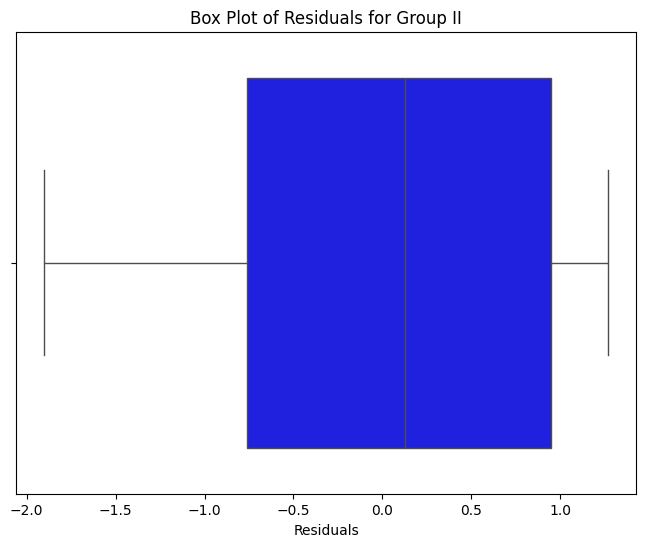

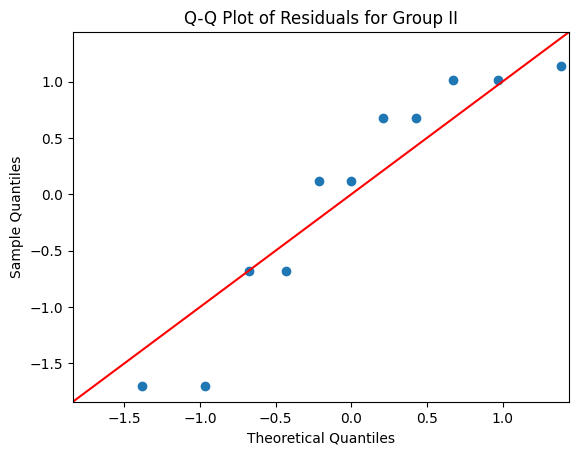

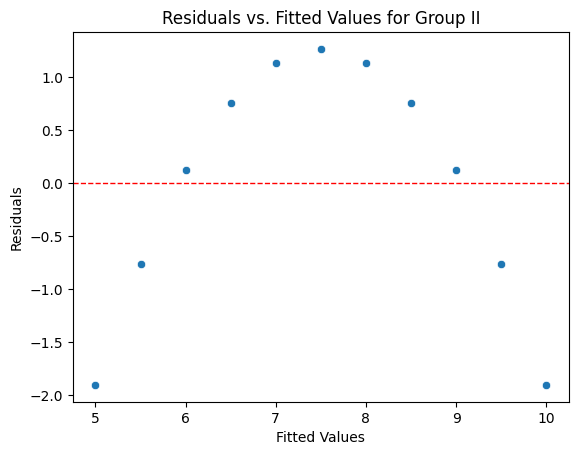

In [10]:
eval2 = evaluate_model(model_2, "Group II")

As the scatter plot is showing the relationship between X and Y is not linear and it is very similar to polynomial relationship, the model coefficient  beta_0 is 3.0009 and beta_1 is 0.5000 and also R^2 is  0.666 which indicate only 66.6 of spread over Y is explained by X variable .  Using Maximum Likelihood Estimation (MLE), we have estimated three parameters for the linear regression model: the coefficients beta_0 and beta_1 as well as Sigma^2 which is estimated by Residual sum of squared (RSS).  In the Q-Q plot of the residuals, the data points do not lie on the Q-Q line, suggesting that the residuals do not follow a normal distribution it is very similar to uniform distribution. From the histogram of the residuals for Model II, it can be concluded that the  mean of the residuals is zero. However, the residuals are not perfectly scattered around the mean, indicating some deviation from the expected distribution. The mean of the residuals for Group II is 0.00, the variance of the residuals is 1.25, and the estimated sigma squared (σ²) for Group II is 1.5307. By analyzing the last plot of residuals versus fitted values, it is confirmed that this linear model is a not good choice for this dataset as they have polynomial relationship. This indicates that one of the key assumptions has been violated, as there is a relationship between the residuals and the fitted values.

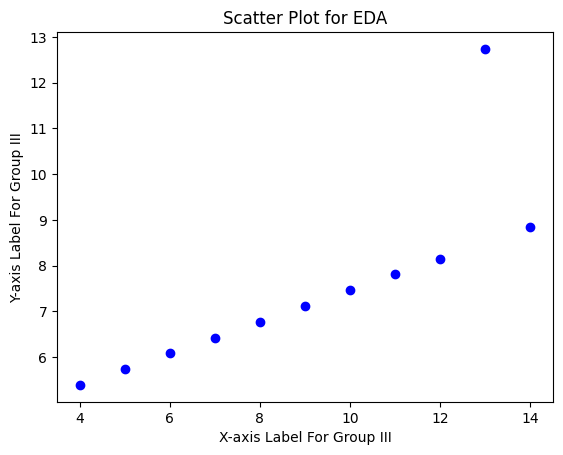

In [11]:
plot_scatter(anscombe_df.x3, anscombe_df.y3, "Group III")

In [12]:
# Add a constant for the intercept in regression
X = sm.add_constant(anscombe_df.x3)  
y = anscombe_df.y3

# Fit OLS Regression Model
model_3 = sm.OLS(y, X).fit()

# Print summary of the model
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                     y3   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Thu, 06 Mar 2025   Prob (F-statistic):            0.00218
Time:                        13:18:14   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0025      1.124      2.670      0.0

c:\Users\AsusTUF\anaconda3\envs\mllabs_python\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Mean of residuals (Group III): -0.00
Variance of residuals (Group III): 1.25
Estimated sigma^2 (Group III): 1.5285
Durbin-Watson statistic (autocorrelation): 2.143577785777381


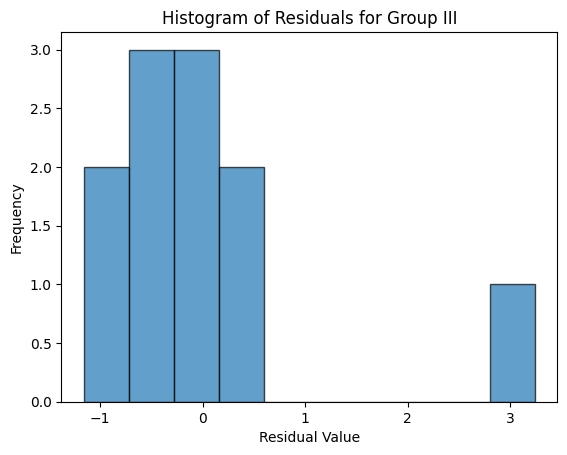

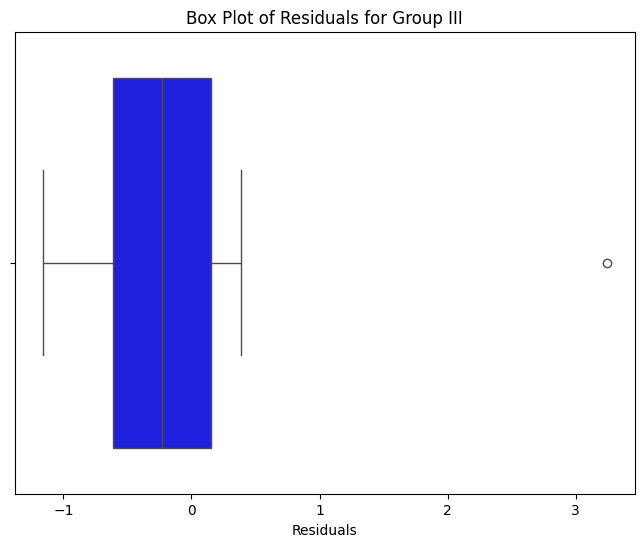

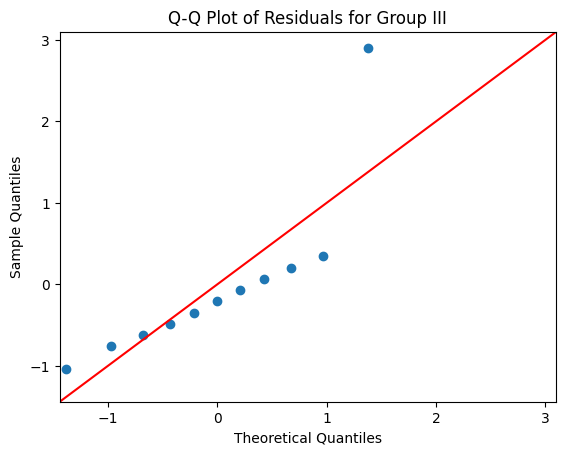

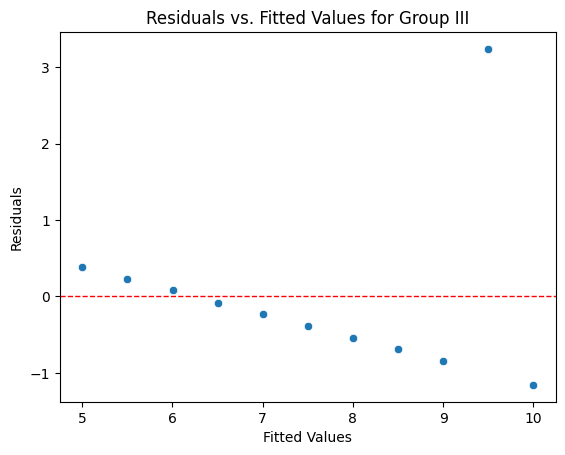

In [13]:
eval3 = evaluate_model(model_3, "Group III")

As the scatter plot is showing the relationship between X and Y is linear but it has one outlier in the scatterplot which will affect the linear model siginificantly, the model coefficient  beta_0 is 3.0025 and beta_1 is 0.4900 and also R^2 is  0.666 which indicate only 66.6 of spread over Y is explained by X variable .  Using Maximum Likelihood Estimation (MLE), we have estimated three parameters for the linear regression model: the coefficients beta_0 and beta_1 as well as Sigma^2 which is estimated by Residual sum of squared (RSS).  In the Q-Q plot of the residuals, the data points do not lie on the Q-Q line, suggesting that the residuals do not follow a normal distribution it is very similar to uniform distribution. From the histogram of the residuals for Model II, it can be concluded that the  mean of the residuals is zero. However, the residuals are not perfectly scattered around the mean, indicating some deviation from the expected distribution. The mean of the residuals for Group III is -0.00, the variance of the residuals is 1.25, and the estimated sigma squared (σ²) for Group III is 1.5285. By analyzing the last plot of residuals versus fitted values, it is confirmed that this linear model is not a good choice for this dataset. The residuals are not scattered around zero and clearly exhibit a trend in relation to the fitted values. This indicates that one of the key assumptions has been violated, as there is a relationship between the residuals and the fitted values.

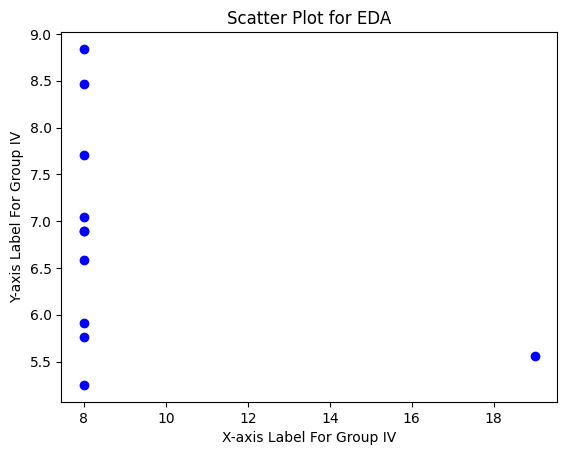

In [14]:
plot_scatter(anscombe_df.x4, anscombe_df.y4, "Group IV")

In [15]:
# Add a constant for the intercept in regression
X = sm.add_constant(anscombe_df.x4)  
y = anscombe_df.y4

# Fit OLS Regression Model
model_4 = sm.OLS(y, X).fit()

# Print summary of the model 4
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                     y4   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.287
Date:                Thu, 06 Mar 2025   Prob (F-statistic):              0.286
Time:                        13:18:14   Log-Likelihood:                -16.086
No. Observations:                  11   AIC:                             36.17
Df Residuals:                       9   BIC:                             36.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9333      1.050      7.554      0.0

c:\Users\AsusTUF\anaconda3\envs\mllabs_python\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Mean of residuals (Group IV): 0.00
Variance of residuals (Group IV): 1.09
Estimated sigma^2 (Group IV): 1.3330
Durbin-Watson statistic (autocorrelation): 1.3321618611970543


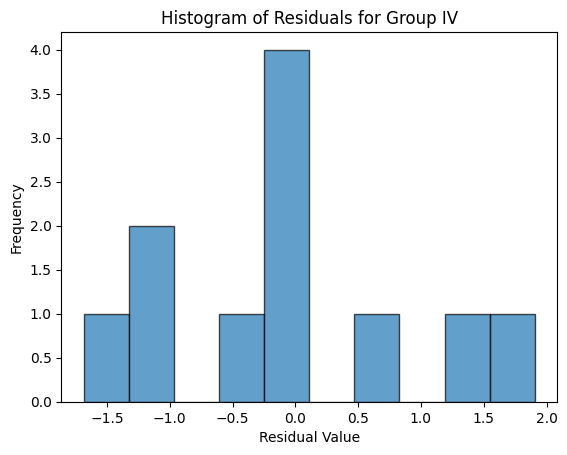

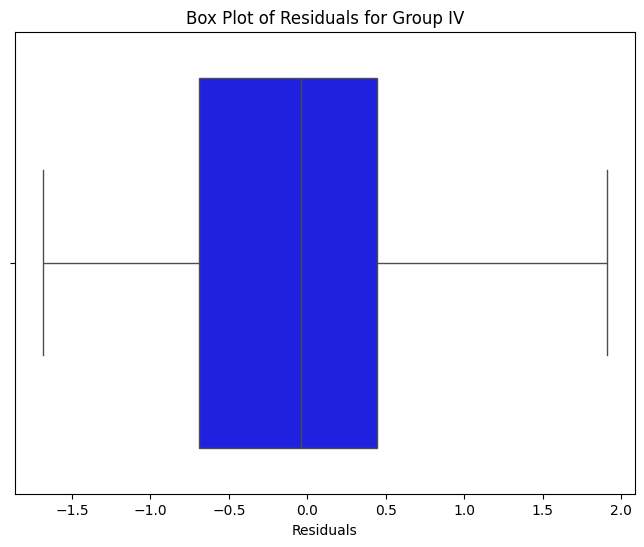

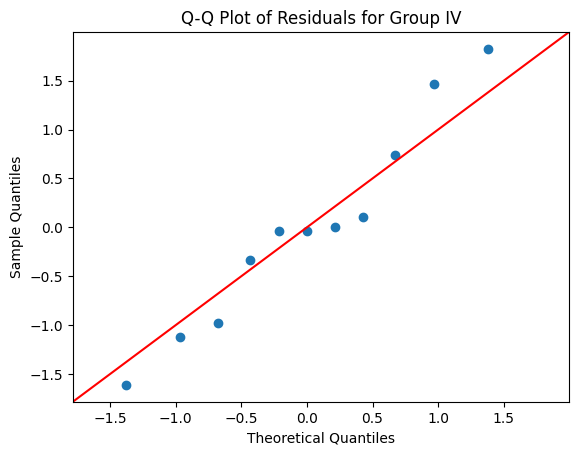

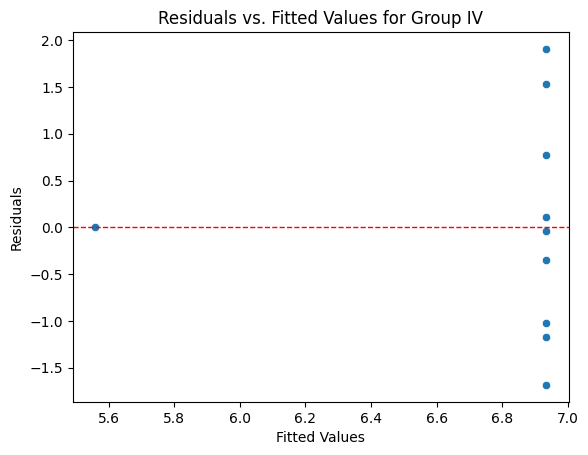

In [16]:
eval4 = evaluate_model(model_4, "Group IV")

As the scatter plot is showing the relationship between X and Y is not linear at all, the model coefficient  beta_0 is 7.933 and beta_1 is -12.49 and also R^2 is  0.125 which indicate only 12.5 of spread over Y is explained by X variable .  That's a very good indication linear model is not good for defining spread Y and also Using Maximum Likelihood Estimation (MLE), we have estimated three parameters for the linear regression model: the coefficients beta_0 and beta_1 as well as Sigma^2 which is estimated by Residual sum of squared (RSS).  In the Q-Q plot of the residuals, the data points do not lie on the Q-Q line, suggesting that the residuals do not follow a normal distribution it is very similar to uniform distribution. From the histogram of the residuals for Model II, it can be concluded that the  mean of the residuals is zero. However, the residuals are not perfectly scattered around the mean, indicating some deviation from the expected distribution. The mean of the residuals for Group IV is 0.00, the variance of the residuals is 1.09, and the estimated sigma squared (σ²) for Group IV is 1.3330. By analyzing the last plot of residuals versus fitted values, it is confirmed that this linear model is a poor choice for this dataset. The values of X are not thoroughly spread, and for the majority of X values, there is only one corresponding value in the dataset. This suggests that one of the key assumptions has been violated, as there is a relationship between the residuals and the fitted values.

In [21]:
# Create DataFrame 
Model_comparison = pd.DataFrame({
    "Model": ["model_1", "model_2", "model_3", "model_4"],
    "Beta0": [model_1.params[0], model_2.params[0], model_3.params[0], model_4.params[0]],
    "Beta1": [model_1.params[1], model_2.params[1], model_3.params[1], model_4.params[1]],
    "Sigma^2": [eval1["sigma_squared"], eval2["sigma_squared"], eval3["sigma_squared"], eval4["sigma_squared"]],
    "R_squared": [model_1.rsquared, model_2.rsquared, model_3.rsquared, model_4.rsquared],
    "R_squaredAdjusted": [model_1.rsquared_adj, model_2.rsquared_adj, model_3.rsquared_adj, model_4.rsquared_adj]
})

Model_comparison = Model_comparison.round(2)

# Display the table
display(Model_comparison)


C:\Users\AsusTUF\AppData\Local\Temp\ipykernel_19972\3459456676.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "Beta0": [model_1.params[0], model_2.params[0], model_3.params[0], model_4.params[0]],
C:\Users\AsusTUF\AppData\Local\Temp\ipykernel_19972\3459456676.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "Beta1": [model_1.params[1], model_2.params[1], model_3.params[1], model_4.params[1]],


,Model,Beta0,Beta1,Sigma^2,R_squared,R_squaredAdjusted
0,model_1,3.00,0.50,1.53,0.67,0.63
1,model_2,3.00,0.50,1.53,0.67,0.63
2,model_3,3.00,0.50,1.53,0.67,0.63
3,model_4,7.93,-0.12,1.33,0.13,0.03
